In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
tdms_1150 = list()
tdms_1100 = list()
for file in os.listdir("../out/time-depth-models/"):
    if file.startswith("tdm_core_1150"):
        tdms_1150.append(file)
    elif file.startswith("tdm_core_1100"):
        tdms_1100.append(file)

In [3]:
tdms_1100

['tdm_core_1100_d18O_conventional.csv', 'tdm_core_1100_d18O_LR04stack_dtw.csv']

In [4]:
tdms_1150

['tdm_core_1150_d18O_bulk_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_LR04stack_out.csv',
 'tdm_core_1150_d18O_bulk_split_1_LR04stack_out.csv',
 'tdm_core_1150_combined_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_combined_LR04stack.csv',
 'tdm_core_1150_d18O_LR04stack_out.csv']

In [5]:
df = pd.read_excel("../out/data_1100.xlsx")

In [6]:
df.columns

Index(['depth_m', 'time_conventional', 'time_dtw', 'd13C_pl', 'd18O_pl',
       'aragonite_%', 'low-magnesium-calcite_%', 'high-magnesium-calcite_%',
       'sedimentation-rates_cm/ka', 'd13C_bulk', 'd18O_bulk',
       'sieve-coarse->63ym_%', 'sieve-fine-<=63ym_%', 'L*', 'a*', 'b*',
       'laser-mean', 'laser-sorting', 'laser-skewness', 'laser-kurtosis',
       'laser-sand', 'laser-mud', 'laser-median'],
      dtype='object')

In [7]:
df['dtw_error'] = df['time_conventional'] - df['time_dtw']

In [10]:
round(abs(df['dtw_error'].mean()), 2)

3.36

In [22]:
sum((df.time_conventional - df.time_dtw) ** 2) * 1/len(df)

63.953321631238154

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
round(mean_squared_error(df.time_conventional, df.time_dtw), 2)

63.95

In [29]:
df['tmp_1'] = df.time_conventional - df.time_dtw

In [32]:
df['tmp_2'] = df.tmp_1 ** 2

<AxesSubplot:>

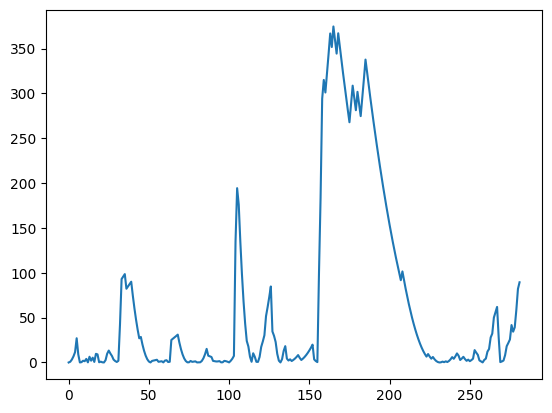

In [34]:
df['tmp_2'].plot()